# Case Study 2 : Data Mining in Yelp Data


Please download the Yelp dataset in Case Study 2 in BrightSpace. 

**Here is an example of the data format:**
### Business Objects

Business objects contain basic information about local businesses. The fields are as follows:

```json
{
  'type': 'business',
  'business_id': (a unique identifier for this business),
  'name': (the full business name),
  'neighborhoods': (a list of neighborhood names, might be empty),
  'full_address': (localized address),
  'city': (city),
  'state': (state),
  'latitude': (latitude),
  'longitude': (longitude),
  'stars': (star rating, rounded to half-stars),
  'review_count': (review count),
  'photo_url': (photo url),
  'categories': [(localized category names)]
  'open': (is the business still open for business?),
  'schools': (nearby universities),
  'url': (yelp url)
}
```
### Checkin Objects
```json
{
    'type': 'checkin',
    'business_id': (encrypted business id),
    'checkin_info': {
        '0-0': (number of checkins from 00:00 to 01:00 on all Sundays),
        '1-0': (number of checkins from 01:00 to 02:00 on all Sundays),
        ...
        '14-4': (number of checkins from 14:00 to 15:00 on all Thursdays),
        ...
        '23-6': (number of checkins from 23:00 to 00:00 on all Saturdays)
    }, # if there was no checkin for a hour-day block it will not be in the dict
}
```

# Problem: pick a data science problem that you plan to solve using Yelp Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using yelp data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

In [ ]:
Problem:

My goal is to use Yelp data to tackle the challenge of predicting a business's profitability and popularity based on a variety
of characteristics, including category, location, and check-in trends. In particular, I want to create a machine learning model
that can forecast how many check-ins a business could get—a sign of both its popularity and future prospects.

Importance and Interest:

This is a significant issue for consumers as well as business owners. Business owners may make decisions about marketing tactics,
resource allocation, and general business success by accurately anticipating the popularity of their locations.
Business leaders can obtain insights into the elements influencing client engagement and adjust their operations by utilizing
Yelp data and data science tools.

Customers' ability to make better decisions about where to eat, buy, and socialize can be improved by having access to precise
estimates of a business's popularity. In the end, this may result in more positive client interactions and satisfaction.

Furthermore, comprehending the mechanics of commercial popularity and success can support efforts at urban planning as well as
more general economic understanding. Policymakers and urban planners can make well-informed judgments on zoning laws,
infrastructure development, and community involvement programs by recognizing patterns and trends in consumer behavior.

In conclusion, resolving this issue with Yelp data and data science solutions could yield insightful information for customers,
company owners, and legislators alike, ultimately resulting in better decisions and experiences for all parties.



# Data Collection/Processing: 

In [16]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import pandas as pd

# Loading -Business data
business_data = pd.read_json('yelp_academic_dataset_business.json', lines=True)

# Loading - Checkin data
checkin_data = pd.read_json('yelp_academic_dataset_checkin.json', lines=True)

# Saving both DataFrames to CSV files
business_data.to_csv('business_data.csv', index=False)
checkin_data.to_csv('checkin_data.csv', index=False)

# Display the first few rows 
display(business_data.head())

display(checkin_data.head())


,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Apn5Q_b6Nz61Tq4XzPdf9A,Minhas Micro Brewery,,1314 44 Avenue NE,Calgary,AB,T2E 6L6,51.091813,-114.031675,4.0,24,1,"{'BikeParking': 'False', 'BusinessAcceptsCredi...","Tours, Breweries, Pizza, Restaurants, Food, Ho...","{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'..."
1,AjEbIBw6ZFfln7ePHha9PA,CK'S BBQ & Catering,,,Henderson,NV,89002,35.960734,-114.939821,4.5,3,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...","Chicken Wings, Burgers, Caterers, Street Vendo...","{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0..."
2,O8S5hYJ1SMc8fA4QBtVujA,La Bastringue,Rosemont-La Petite-Patrie,1335 rue Beaubien E,Montréal,QC,H2G 1K7,45.540503,-73.599300,4.0,5,0,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...","Breakfast & Brunch, Restaurants, French, Sandw...","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'..."
3,bFzdJJ3wp3PZssNEsyU23g,Geico Insurance,,211 W Monroe St,Phoenix,AZ,85003,33.449999,-112.076979,1.5,8,1,None,"Insurance, Financial Services",None
4,8USyCYqpScwiNEb58Bt6CA,Action Engine,,2005 Alyth Place SE,Calgary,AB,T2H 0N5,51.035591,-114.027366,2.0,4,1,{'BusinessAcceptsCreditCards': 'True'},"Home & Garden, Nurseries & Gardening, Shopping...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."


,checkin_info,type,business_id
0,"{'9-5': 1, '7-5': 1, '13-3': 1, '17-6': 1, '13...",checkin,cE27W9VPgO88Qxe4ol6y_g
1,"{'16-2': 1, '22-5': 1, '9-5': 1, '9-4': 3, '15...",checkin,mVHrayjG3uZ_RLHkLj-AMg
2,"{'23-1': 1, '13-4': 1, '17-6': 1, '15-1': 1, '...",checkin,KayYbHCt-RkbGcPdGOThNg
3,"{'5-5': 2, '5-1': 2, '8-2': 1}",checkin,b12U9TFESStdy7CsTtcOeg
4,"{'15-1': 1, '13-3': 1, '16-0': 1, '9-3': 1, '1...",checkin,QoDa50dc7g62xciFygXB9w


# Data Exploration: Exploring the Yelp Dataset

**(1) Finding the most popular business categories:** 
* print the top 10 most popular business categories in the dataset and their counts in a table (i.e., how many business objects in each category). Here we say a category is "popular" if there are many business objects in this category (such as 'restaurants').

In [18]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


# Grouping by categories and counting the number of businesses in each category
categorycounts = business_data.explode('categories')['categories'].value_counts()

print("Top 10 Most Popular Business Categories are as below:")
print(categorycounts.head(10))



Top 10 Most Popular Business Categories are as below:
Restaurants, Pizza            1092
Pizza, Restaurants            1060
Coffee & Tea, Food            1036
Nail Salons, Beauty & Spas    1015
Beauty & Spas, Nail Salons     981
Food, Coffee & Tea             966
Restaurants, Mexican           932
Mexican, Restaurants           908
Beauty & Spas, Hair Salons     893
Restaurants, Chinese           889
Name: categories, dtype: int64


**(2) Find the most popular business objects** 
* print the top 10 most popular business objects/IDs in the dataset and their counts (i.e., how many checkins in total for each business object).  Here we say a business object is "popular" if the business object attracts a large number of checkins from the users.

In [19]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import pandas as pd

# Calculating the total check-ins
checkin_data['total_checkins'] = checkin_data['checkin_info'].apply(lambda x: sum(x.values()))

# Grouping by business ids
business_checkins = checkin_data.groupby('business_id')['total_checkins'].sum()

# Sorting in descending order 
business_checkins_sorted = business_checkins.sort_values(ascending=False)

# Display of top 10 rows 
topbusinesses = business_checkins_sorted.head(10)
print(topbusinesses)


business_id
jf67Z1pnwElRSXllpQHiJg    77320
hW0Ne_HTHEAgGF1rAdmR-g    68711
3Q0QQPnHcJuX1DLCL9G9Cg    29893
AtjsjFzalWqJ7S9DUFQ4bw    27356
JpHE7yhMS5ehA9e8WG_ETg    18208
34uJtlPnKicSaX1V8_tu1A    18099
eWPFXL1Bmu1ImtIa2Rqliw    17671
-7yF42k0CcJhtPw51oaOqQ    17419
z3SyT8blMIhsZNvKJgKcRA    17161
2e2e7WgqU1BnpxmQL5jbfw    16641
Name: total_checkins, dtype: int64


**(3) Other explorations you would like to present** 


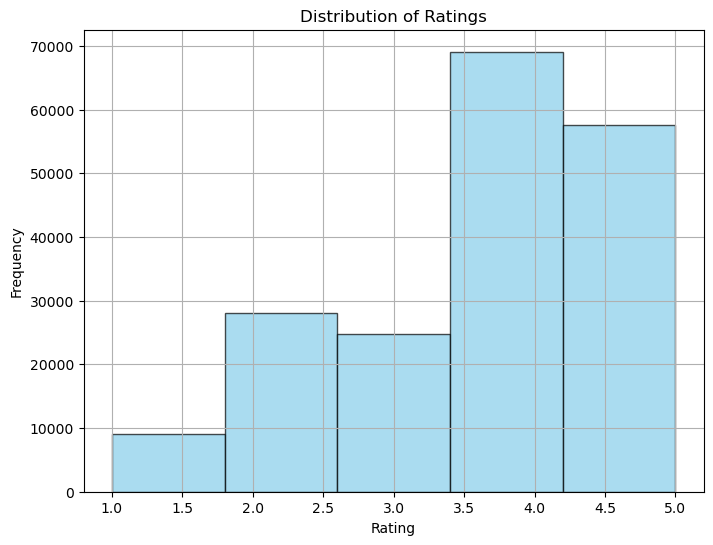

In [11]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import matplotlib.pyplot as plt

# Plot distribution of ratings
plt.figure(figsize=(8, 6))
business_df['stars'].hist(bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()



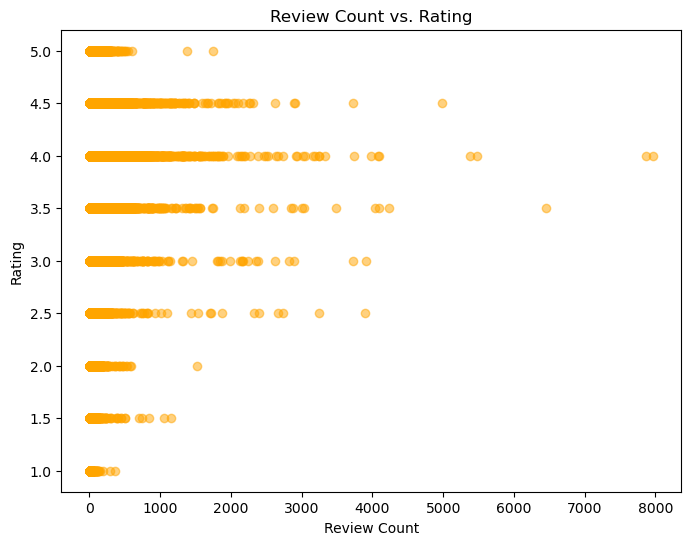

In [12]:
# Scatter plot 
plt.figure(figsize=(8, 6))
plt.scatter(business_df['review_count'], business_df['stars'], color='orange', alpha=0.5)
plt.xlabel('Review Count')
plt.ylabel('Rating')
plt.title('Review Count vs. Rating')
plt.show()


In [20]:
# Grouping by city and category 
city_counts = business_data.groupby(['city', 'categories']).size().reset_index(name='count')

# Most popular city 
most_categories = city_counts.loc[city_counts.groupby('city')['count'].idxmax()]

print("Most Popular Categories by City:")
print(most_categories)

Most Popular Categories by City:
                  city                                         categories  \
0                                                  Active Life, Laser Tag   
10       110 Las Vegas  Smog Check Stations, Automotive, Oil Change St...   
11           AGINCOURT                    Fast Food, Burgers, Restaurants   
12           Agincourt                    Restaurants, Fast Food, Burgers   
13          Ahwahtukee  Local Services, Professional Services, Carpet ...   
...                ...                                                ...   
131992           tempe                    Donation Center, Local Services   
131993         toronto  Home Decor, Home Services, Interior Design, Fu...   
131997         vaughan                        Middle Eastern, Restaurants   
131998  Île des Soeurs                            Day Spas, Beauty & Spas   
131999  Île-des-Soeurs                            Restaurants, Sushi Bars   

        count  
0           1  
10        

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

In [ ]:
Solution:
The data science approach uses a variety of characteristics, including location, category, and check-in behaviors, to forecast
the popularity and performance of companies on Yelp.
The solution involves the following steps:

1. Data Collection: Compile Yelp company information, such as check-in statistics and attributes like category, location,
number of reviews, and rating.

2. Data Preprocessing: By addressing missing values, encoding categorical variables, and combining pertinent datasets, 
you can clean up and preprocess the data.

3. Feature Engineering: Extract location attributes, company categories, and aggregated check-in data, among other relevant 
elements, from the data.

4. Model Selection:Select suitable machine learning models, including regression or classification algorithms, to forecast 
company success measures, like popularity or the number of reviews.

5. Model Training: With the preprocessed data, train the chosen models, making use of strategies like cross-validation to
guarantee robustness and generalization.

6. Model Evaluation: Use appropriate measures to assess the performance of the trained models, such as accuracy for
    classification or mean squared error for regression.

7. Prediction:Make predictions on new or unseen data by using the trained models, which can offer insights into the possible
    success of enterprises based on their characteristics.


Our goal in putting this data science solution into practice is to give business owners insightful advice on how to improve 
their operations and raise their chances of success on Yelp.



Write codes to implement the solution in python:

In [21]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Data Collection
business_data = pd.read_json('yelp_academic_dataset_business.json', lines=True)
checkin_data= pd.read_json('yelp_academic_dataset_checkin.json', lines=True)

#  Data Preprocessing
merged_data = pd.merge(business_data, checkin_data, on='business_id', how='left')

# Drop unnecessary columns
merged_data.drop(['address', 'postal_code', 'hours'], axis=1, inplace=True)

# Model Selection
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}

#  Model Training and Evaluation
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    X = merged_df[['latitude', 'longitude', 'review_count']] 
    y = merged_df['stars']  # Target variable
    
    # Impute missing values with mean
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = model.predict(X_test)

    # MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Mean Squared Error:", mse)


Training and evaluating Linear Regression...
Linear Regression Mean Squared Error: 1.0135422455721437
Training and evaluating Decision Tree Regressor...
Decision Tree Regressor Mean Squared Error: 1.8026725212666206
Training and evaluating Random Forest Regressor...
Random Forest Regressor Mean Squared Error: 1.057722651761965


# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


Linear Regression Mean Squared Error: 1.0135422455721437
Decision Tree Regressor Mean Squared Error: 1.8026725212666206
Random Forest Regressor Mean Squared Error: 1.057722651761965


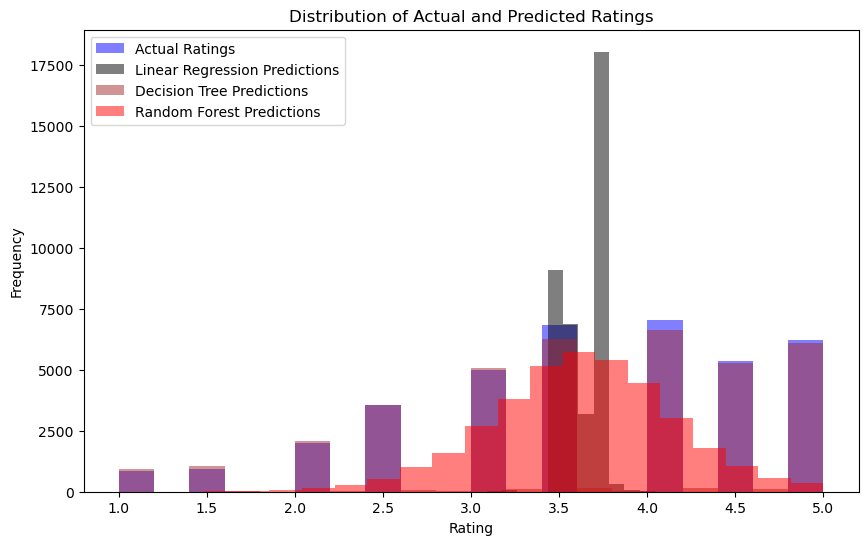

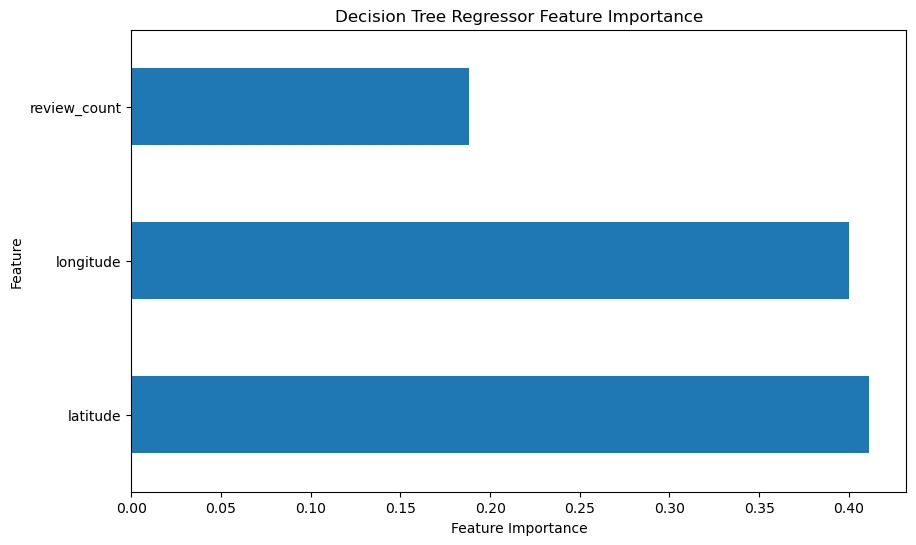

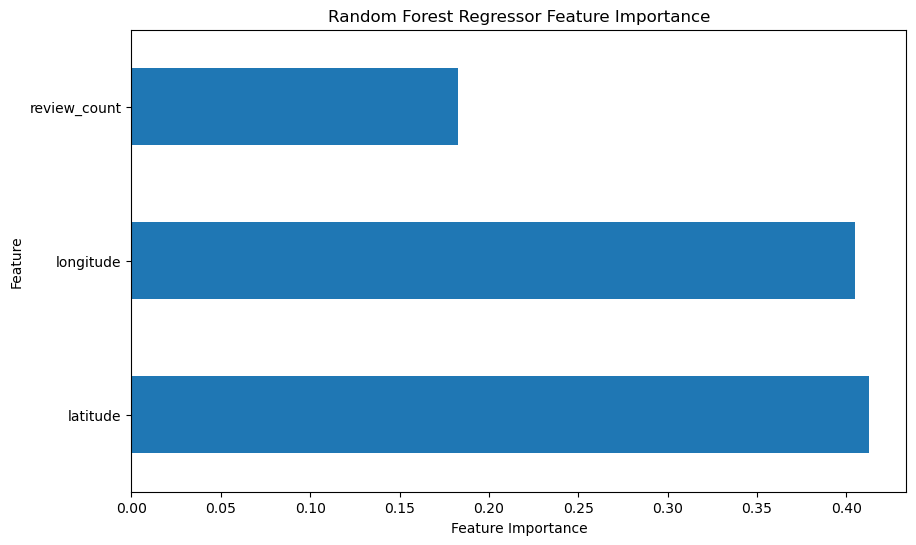

In [23]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import matplotlib.pyplot as plt

#  Results Summary and Visualization
model_mses = {}

#MSE and predictions
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    model_mses[name] = mse
    
    if name == 'Linear Regression':
        y_pred_lr = y_pred
    elif name == 'Decision Tree Regressor':
        y_pred_dt = y_pred
    elif name == 'Random Forest Regressor':
        y_pred_rf = y_pred

# MSE for each model
for name, mse in model_mses.items():
    print(f"{name} Mean Squared Error:", mse)

#  Visualizations
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, color='blue', alpha=0.5, label='Actual Ratings')
plt.hist(y_pred_lr, bins=20, color='black', alpha=0.5, label='Linear Regression Predictions')
plt.hist(y_pred_dt, bins=20, color='brown', alpha=0.5, label='Decision Tree Predictions')
plt.hist(y_pred_rf, bins=20, color='red', alpha=0.5, label='Random Forest Predictions')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Ratings')
plt.legend()
plt.show()

#  Plot feature importance
if hasattr(models['Decision Tree Regressor'], 'feature_importances_'):
    feature_importance_dt = pd.Series(models['Decision Tree Regressor'].feature_importances_, index=X.columns)
    feature_importance_dt.plot(kind='barh', figsize=(10, 6))
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Decision Tree Regressor Feature Importance')
    plt.show()

if hasattr(models['Random Forest Regressor'], 'feature_importances_'):
    feature_importance_rf = pd.Series(models['Random Forest Regressor'].feature_importances_, index=X.columns)
    feature_importance_rf.plot(kind='barh', figsize=(10, 6))
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Random Forest Regressor Feature Importance')
    plt.show()



*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and submit it in BrightSpace. Please make sure all the plotted tables and figures are in the notebook. 